In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

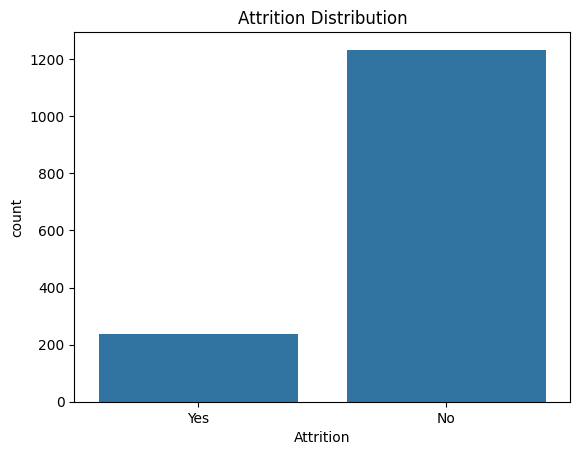

In [5]:
# Check for nulls and basic info
print(df.info())
print(df['Attrition'].value_counts())

# Visualize class imbalance
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()

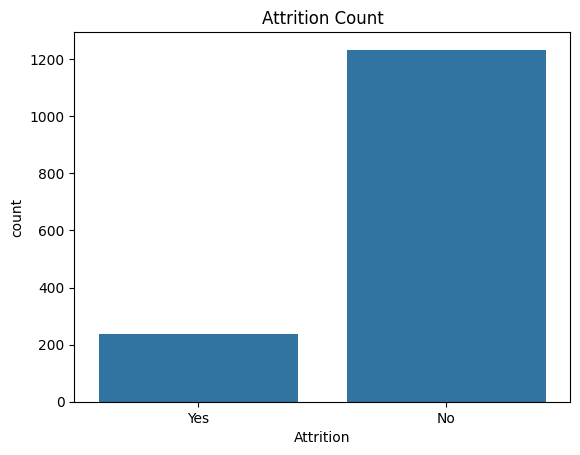

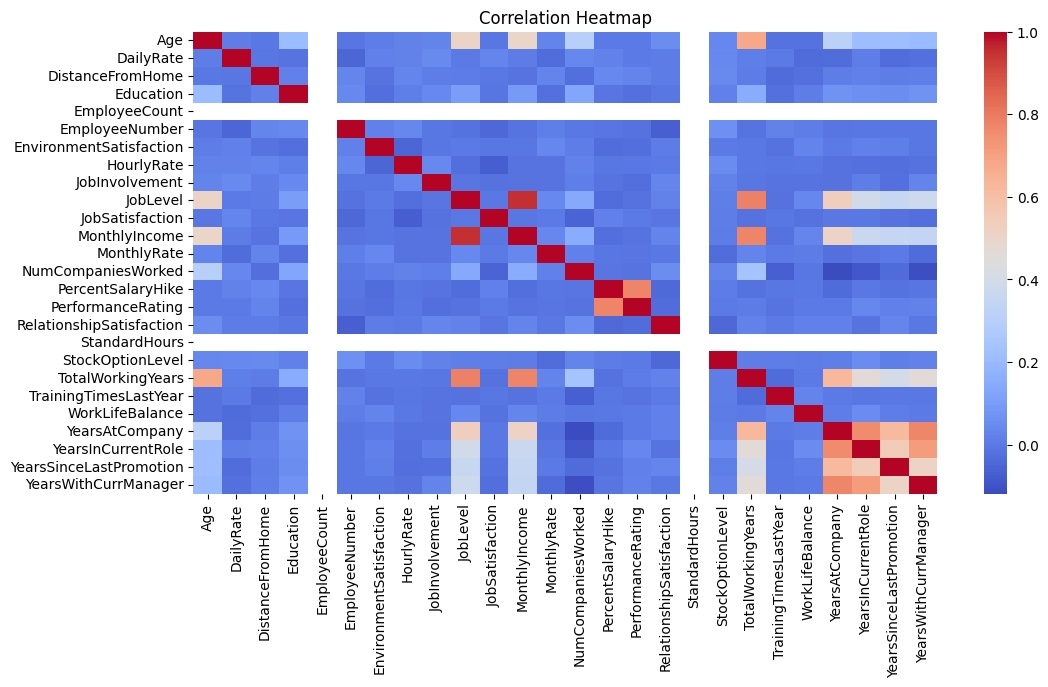

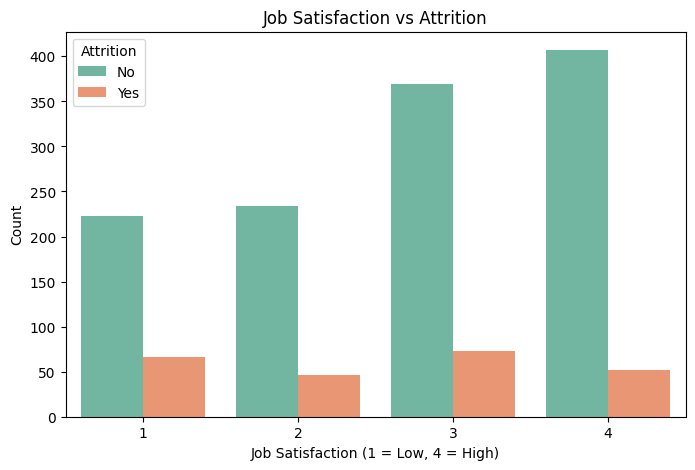

In [6]:
# Check target distribution
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Count")
plt.show()
# This graph displays the distribution of the target variable – whether an employee has left the company (Attrition = Yes)
# or not (Attrition = No).
# It helps us understand the class imbalance in the dataset.
# If one class (e.g., "No") is significantly higher than the other, it indicates the need for balancing techniques like SMOTE.

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()
# This heatmap displays the correlation coefficients between all numerical features in the dataset.
# Values range from -1 to +1.
#     +1 indicates a strong positive correlation.
#     -1 indicates a strong negative correlation.
#     0 means no linear correlation.
# This helps us identify features that might be strongly related, which can guide feature selection or removal to avoid multicollinearity.
# Job Satisfaction Countplot split by Attrition
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='Set2')
plt.title("Job Satisfaction vs Attrition")
plt.xlabel("Job Satisfaction (1 = Low, 4 = High)")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()
# If attrition is higher at satisfaction level 1, it suggests low satisfaction is linked to higher attrition.
# If level 4 shows mostly "No", it implies higher satisfaction may retain employees better.

In [7]:
#  Drop unnecessary columns
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
# we dropped :
# EmployeeCount: This column has the same value for all employees(usually 1),so it doesn’t provide any useful information for the model.
# EmployeeNumber: It’s a unique identifier for each employee, like an ID. It creates noise.
# Over18:  Like EmployeeCount, it’s constant across the dataset, so it adds no value
# StandardHours: All employees have the same standard hours (usually 40).No variation = no influence on model prediction.

In [8]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [9]:
# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [10]:
# Feature Scaling
scaler = StandardScaler()
# StandardScaler normalizes the features so they all have:
    # Mean = 0
    # Standard Deviation = 1
X_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Attrition', axis=1)), columns=df.drop('Attrition', axis=1).columns)
y = df['Attrition']
# since in ml:
    # X = Features (input variables we use to make predictions)
    # y = Target (what we want to predict)
# X_scaled = All employee-related attributes (like Age, JobSatisfaction, Department, etc.)
# y = Whether the employee left the company or not → the Attrition column (usually "Yes"/"No", or 0/1 after encoding)

In [11]:
# Show class distribution before SMOTE
print("Before SMOTE - Class distribution:")
print(y.value_counts())

# Handle Class Imbalance with SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# Show class distribution after SMOTE
print("\nAfter SMOTE - Class distribution:")
print(pd.Series(y_resampled).value_counts())

Before SMOTE - Class distribution:
Attrition
0.0    1233
1.0     237
Name: count, dtype: int64

After SMOTE - Class distribution:
Attrition
1.0    1233
0.0    1233
Name: count, dtype: int64


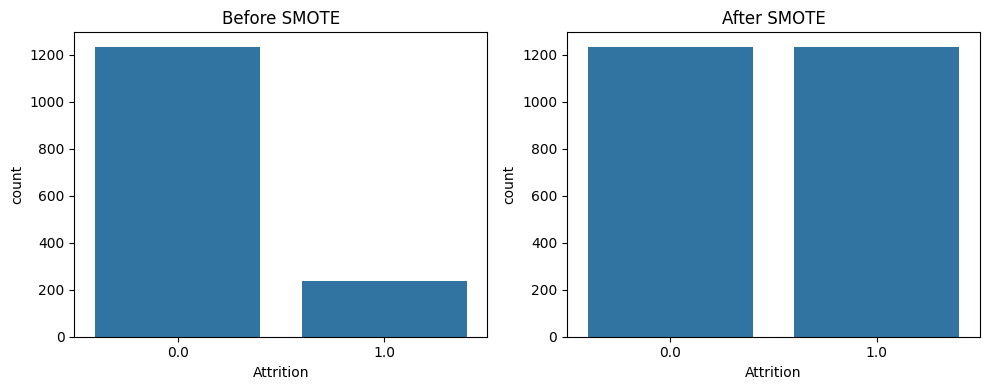

In [12]:
plt.figure(figsize=(10, 4))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title("Before SMOTE")
plt.xlabel("Attrition")

# SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic samples of
# the minority class (e.g., employees who left) so that the dataset becomes balanced.
# Purpose: Fix imbalance so the model won’t be biased toward the majority class.
# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("After SMOTE")
plt.xlabel("Attrition")
plt.tight_layout()
plt.show()

In [13]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
# SelectKBest is a feature selection technique.
# It selects the top k features that have the strongest relationship with the target variable (y_resampled, which is Attrition here).
# You set k=10, so it will keep only the 10 most important features.
X_selected = selector.fit_transform(X_resampled, y_resampled)
selected_features = X_scaled.columns[selector.get_support()]
print("Top features:", selected_features)

Top features: Index(['Age', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability = True)
}
model_accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc
    print(f"--- {name} ---")
    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

--- Logistic Regression ---
Logistic Regression Accuracy: 0.6943
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.68      0.69       250
         1.0       0.68      0.71      0.70       244

    accuracy                           0.69       494
   macro avg       0.69      0.69      0.69       494
weighted avg       0.69      0.69      0.69       494

--- Random Forest ---
Random Forest Accuracy: 0.8664
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       250
         1.0       0.88      0.84      0.86       244

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494

--- Support Vector Machine ---
Support Vector Machine Accuracy: 0.7429
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0

In [15]:
for name, model in models.items():
    scores = cross_val_score(model, X_selected, y_resampled, cv=5)
    print(f"{name} Average CV Score: {np.mean(scores):.4f}")


Logistic Regression Average CV Score: 0.7271
Random Forest Average CV Score: 0.8906
Support Vector Machine Average CV Score: 0.7851


<ipython-input-16-3143671cc981>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


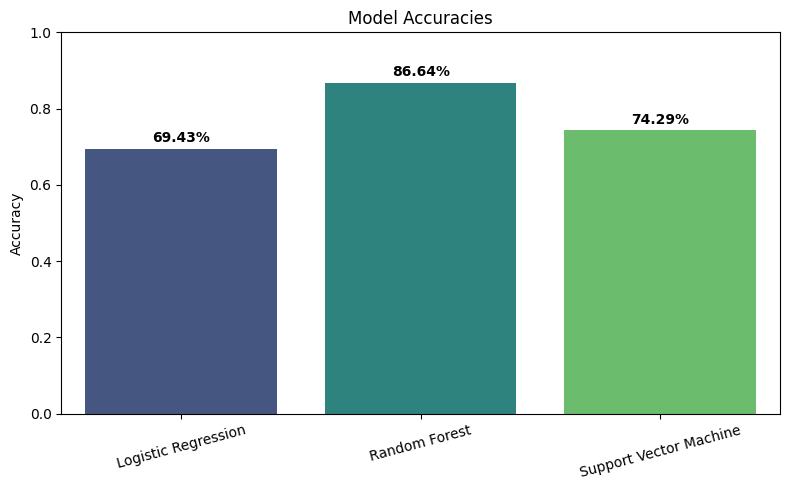

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accuracies
plt.figure(figsize=(8, 5))
bars = sns.barplot(
    x=list(model_accuracies.keys()),
    y=list(model_accuracies.values()),
    palette='viridis',
    legend=False
)

plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.ylim(0, 1)
plt.xticks(rotation=15)


for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height * 100:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# --- Feature Selection (already done) ---
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_resampled, y_resampled)
selected_features = X_scaled.columns[selector.get_support()]
print("Selected Top Features:", selected_features)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# --- Hyperparameter Tuning for Random Forest ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters Found:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# --- Evaluate on Test Data ---
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Selected Top Features: Index(['Age', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters Found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score: 0.8965507935488016
Test Accuracy: 0.8805668016194332
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       250
         1.0       0.91      0.84      0.87       244

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494



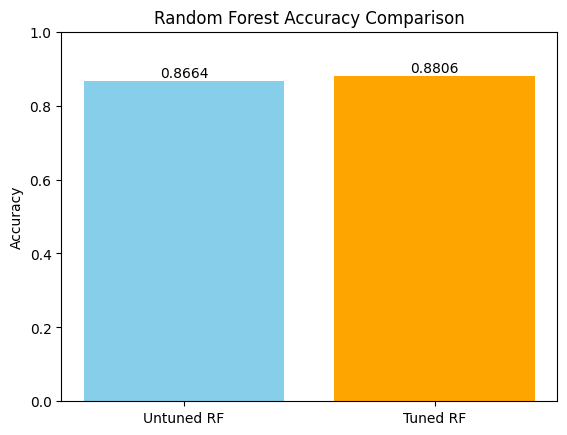

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data (assuming X_selected and y_resampled are already defined)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Untuned Random Forest
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# GridSearchCV for Tuned Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_tuned)

# Plotting comparison
plt.bar(['Untuned RF', 'Tuned RF'], [acc_default, acc_tuned], color=['skyblue', 'orange'])
plt.title('Random Forest Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.text(0, acc_default + 0.01, f'{acc_default:.4f}', ha='center')
plt.text(1, acc_tuned + 0.01, f'{acc_tuned:.4f}', ha='center')
plt.show()
